In [1]:
import pandas as pd
import graphlot as grpl
import genopyc as gp
import networkx as nx

# Load the data

In [4]:
secretome_deg = pd.read_excel('../data/CORRECT_Secretome profile human degenerated NPC.xlsx')
secretome_healthy = pd.read_excel('../data/Secretome profile human trauma NPC_(healthy).xlsx')
interactome = pd.read_csv('../data/HIPPIE-current.mitab.txt',sep='\t')


/tmp/ipykernel_3738/730401835.py:3: DtypeWarning: Columns (12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactome = pd.read_csv('../data/HIPPIE-current.mitab.txt',sep='\t')


In [5]:
interactome = interactome[interactome.columns[:2]]
interactome[interactome.columns[0]] = interactome[interactome.columns[0]].apply(lambda x: x.replace('entrez gene:',''))
interactome[interactome.columns[1]] = interactome[interactome.columns[1]].apply(lambda x: x.replace('entrez gene:',''))

In [6]:
interactome = interactome[~interactome['ID Interactor A'].str.contains('-')]
interactome = interactome[~interactome['ID Interactor B'].str.contains('-')]
interactome = interactome.astype(int)

In [7]:
interactome['ID_A_symbol'] = gp.geneId_mapping(interactome['ID Interactor A'].tolist(),'entrez','symbol')
interactome['ID_B_symbol'] = gp.geneId_mapping(interactome['ID Interactor B'].tolist(),'entrez','symbol') 

In [8]:
interactome.dropna(inplace=True)

# Parse the files

In [9]:
cols_secretome = secretome_deg.iloc[3]
secretome_healthy.columns = cols_secretome
secretome_deg.columns = cols_secretome

In [10]:
secretome_healthy = secretome_healthy[4:]
secretome_deg = secretome_deg[4:]


In [11]:
secretome_deg.head()

3,Analyte:,IL4,IL1B,IL1A,IFNG,CSF3,KITLG,IL17F,IL7,IL16,...,TGFB1,CCL11,VCAM1,TIMP1,MMP2,MMP9,CCL5,ICAM1,SERPINE1,DEFB1
4,AL-HD615-No Treat_1,16.334167,2.12132,2.12132,7.212489,22.839549,0.791925,16.263456,3.677521,10.181358,...,48.083261,2.12132,88.714759,620.340105,16600,2.12132,2.12132,56.605186,190.672389,2.12132
5,AL-HD615-No Treat_2,16.334167,2.12132,2.12132,7.212489,22.839549,0.812623,16.263456,4.317971,13.363359,...,48.083261,8.476072,113.23831,567.71186,16600,21.517642,2.12132,92.751246,206.990512,4.285474
6,AL-HD615-No Treat_3,16.334167,2.12132,2.12132,14.509159,22.839549,1.018896,16.263456,4.610939,15.632614,...,48.083261,2.12132,111.471805,623.994232,16600,9.80383,2.12132,91.390998,265.460146,4.910147
7,AL-HD615-IL4_1,5500,2.12132,2.12132,24.001167,22.839549,1.434049,27.124493,9.613736,20.434606,...,48.083261,2.12132,334.377147,749.644061,16600,2.12132,2.12132,69.143543,299.466436,3.977022
8,AL-HD615-IL4_2,5500,2.12132,2.12132,30.348239,22.839549,1.195813,27.21716,6.329551,5.11236,...,48.083261,2.12132,362.34979,503.833948,16600,17.307313,2.12132,74.894257,254.113157,2.12132


In [10]:
secretome_deg

3,Analyte:,IL4,IL1B,IL1A,IFNG,CSF3,KITLG,IL17F,IL7,IL16,...,TGFB1,CCL11,VCAM1,TIMP1,MMP2,MMP9,CCL5,ICAM1,SERPINE1,DEFB1
4,AL-HD615-No Treat_1,16.334167,2.12132,2.12132,7.212489,22.839549,0.791925,16.263456,3.677521,10.181358,...,48.083261,2.12132,88.714759,620.340105,16600,2.12132,2.12132,56.605186,190.672389,2.12132
5,AL-HD615-No Treat_2,16.334167,2.12132,2.12132,7.212489,22.839549,0.812623,16.263456,4.317971,13.363359,...,48.083261,8.476072,113.23831,567.71186,16600,21.517642,2.12132,92.751246,206.990512,4.285474
6,AL-HD615-No Treat_3,16.334167,2.12132,2.12132,14.509159,22.839549,1.018896,16.263456,4.610939,15.632614,...,48.083261,2.12132,111.471805,623.994232,16600,9.80383,2.12132,91.390998,265.460146,4.910147
7,AL-HD615-IL4_1,5500,2.12132,2.12132,24.001167,22.839549,1.434049,27.124493,9.613736,20.434606,...,48.083261,2.12132,334.377147,749.644061,16600,2.12132,2.12132,69.143543,299.466436,3.977022
8,AL-HD615-IL4_2,5500,2.12132,2.12132,30.348239,22.839549,1.195813,27.21716,6.329551,5.11236,...,48.083261,2.12132,362.34979,503.833948,16600,17.307313,2.12132,74.894257,254.113157,2.12132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,AL-HD675-IL4,5500,2.12132,2.12132,28.254954,22.839549,1.473322,24.054552,7.200225,5.820328,...,48.083261,3.578541,93.802798,1900,16600,2.44965,3.389407,59.466941,650.547391,2.12132
76,AL-HD675-IL10,16.334167,2.12132,2.12132,11.466285,22.839549,0.494975,16.263456,5.276014,5.04451,...,48.083261,2.47526,21.84696,1900,16484.575504,2.826139,3.361477,63.160337,1135.644702,2.12132
77,AL-HD675-IL1,35.013246,438.349415,2.423972,20.398953,406.265026,2.264873,16.263456,6.424684,34.933461,...,48.083261,3.077584,364.861568,1900,16600,2.675259,163.335185,368.082444,432.487775,7.276256
78,AL-HD675-IL1+IL4,5019.265472,321.206514,4.565344,38.264092,387.096714,2.992257,29.703529,9.124147,39.609576,...,48.083261,2.12132,1155.67953,1900,16600,2.12132,96.263076,222.295362,424.43717,5.234827


In [11]:
secretome_healthy.head()

3,Analyte:,IL4,IL1B,IL1A,IFNG,CSF3,KITLG,IL17F,IL7,IL16,...,TGFB1,CCL11,VCAM1,TIMP1,MMP2,MMP9,CCL5,ICAM1,SERPINE1,DEFB1
4,142_S1_Ctrl_DONOR1,16.334167,2.12132,2.12132,7.212489,22.839549,0.494975,16.263456,2.12132,2.12132,...,68.732602,2.12132,123.978857,2052.168154,1803.527686,2.12132,6.908848,32.498471,2447.506576,16.385538
5,143_S2_IL4_DONOR1,321.736335,2.12132,2.12132,7.212489,22.839549,0.935614,16.263456,2.12132,2.12132,...,77.537051,2.12132,161.590714,2114.868815,1641.488057,2.12132,6.140666,28.228864,2148.651793,11.226913
6,144_S3_IL1_DONOR1,37.822216,151.389399,2.12132,20.36198,177.608311,4.676315,16.263456,4.928649,32.40502,...,48.083261,2.12132,470.772638,2098.493638,1418.574411,7.87869,27.877928,185.22572,612.595493,11.872407
7,145_S4_Ctrl_DONOR2,16.334167,2.12132,2.12132,7.212489,32.315944,0.494975,16.263456,2.12132,2.12132,...,87.680766,2.12132,5.734342,2217.82799,3093.846109,3.596343,4.331521,26.475898,4448.981853,3.584128
8,146_S5_IL4_DONOR2,475.581854,2.12132,2.12132,22.212977,22.839549,1.20644,16.263456,2.12132,2.12132,...,48.083261,2.12132,6.965183,2314.622224,2631.511866,2.12132,2.12132,23.351559,3496.981268,3.61337


# Check if secretome healthy and degenerated have the same columns (proteins)

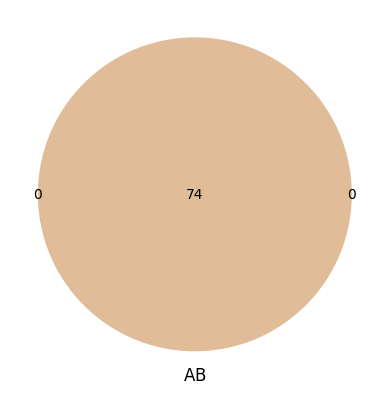

In [15]:
import matplotlib_venn as pltv

pltv.venn2([set(secretome_deg.columns.tolist()),set(secretome_healthy.columns.tolist())])

# CHECK IF ALL THE PROTEINS OF THE SECRETOME ARE IN THE INTERACTOME FILE 

In [12]:
interactome_proteins = set(interactome['ID_A_symbol'].tolist() + interactome['ID_B_symbol'].tolist())

Modified names

- Eotaxin -> ccl11
- rantes -> ccl5
- tweak -> tnfsf12
- srankl -> tnfsf11
- il1ra -> il1rn
- G-CSF -> CSF3
- SCF -> KITLG
- TNFA -> TNF
- FGF BASIC -> FGF2
- IL1RA -> IL1RN
- GM CSF -> CSF2
- M CSF -> CSF3
- IL12 -> IL12A
- CTACK -> CCL27
- IP10 -> CXCL10
- GROA -> CXCL1
- TNF10 -> TNFSF10
- ST2 -> IL1RL1
- SRANK-L -> TNFSF11
- VEGF -> VEGFA
- TGF-b1 -> TGFB1
- rantes -> ccl5
- IL8 -> CXCL8

In [13]:
print(f"the proteins: {[g for g in cols_secretome if g not in interactome_proteins]} are not in the interactome")

the proteins: ['Analyte:', 'CCL4', 'IL8'] are not in the interactome


# CREATE GUILD INPUTS

## INTERACTOME

Here I will create the network file of the interactome by keeping the largest connected component

In [14]:
interactome_net = nx.from_pandas_edgelist(interactome[['ID_A_symbol','ID_B_symbol']],source='ID_A_symbol',target='ID_B_symbol')
interactome_net

In [15]:
largest_cc = max(nx.connected_components(interactome_net), key=len)

In [16]:
interactome_cc = nx.subgraph(interactome_net,largest_cc)

In [17]:
interactome_pandas = nx.to_pandas_edgelist(interactome_cc)
interactome_pandas

,source,target
0,ALDH1A1,ALDH1A1
1,ALDH1A1,NUPR1
2,ALDH1A1,ALDH2
3,ALDH1A1,POT1
4,ALDH1A1,NOS2
...,...,...
775831,VNN1,VNN3P
775832,KLK14,OR13C3
775833,SPDYE7P,SPDYE3
775834,GADL1,OR10A4


In [18]:
interactome_pandas.insert(1,'score',1)

In [19]:
interactome_pandas.head()

,source,score,target
0,ALDH1A1,1,ALDH1A1
1,ALDH1A1,1,NUPR1
2,ALDH1A1,1,ALDH2
3,ALDH1A1,1,POT1
4,ALDH1A1,1,NOS2


## SEEDS FILES

Healthy:control, il1 and il4

Degenerated: control, il1, il4, il1+il4 a
nd il1+il10




In [20]:
secretome_deg = secretome_deg.iloc[58:]

In [21]:
secretome_deg.set_index('Analyte:',inplace=True)

In [22]:
secretome_deg = secretome_deg.drop(['CCL4', 'IL8'],axis=1)

In [23]:
def minmax_scale_list(data, min_value=0, max_value=1):
    """
    Min-max scale a list of numbers to a specified range.

    Parameters:
        data (list): The list of numbers to be scaled.
        min_value (float): The minimum value of the desired range (default: 0).
        max_value (float): The maximum value of the desired range (default: 1).

    Returns:
        list: The scaled list of numbers.
    """
    min_data = min(data)
    max_data = max(data)
    scaled_data = [(x - min_data) / (max_data - min_data) * (max_value - min_value) + min_value for x in data]
    return scaled_data

# How much are connected those nodes

To run guild we need connections otherwise we won't have any passage


In [24]:
secretome_proteins = secretome_deg.columns.tolist()
secretome_network = nx.subgraph(interactome_net,secretome_proteins)

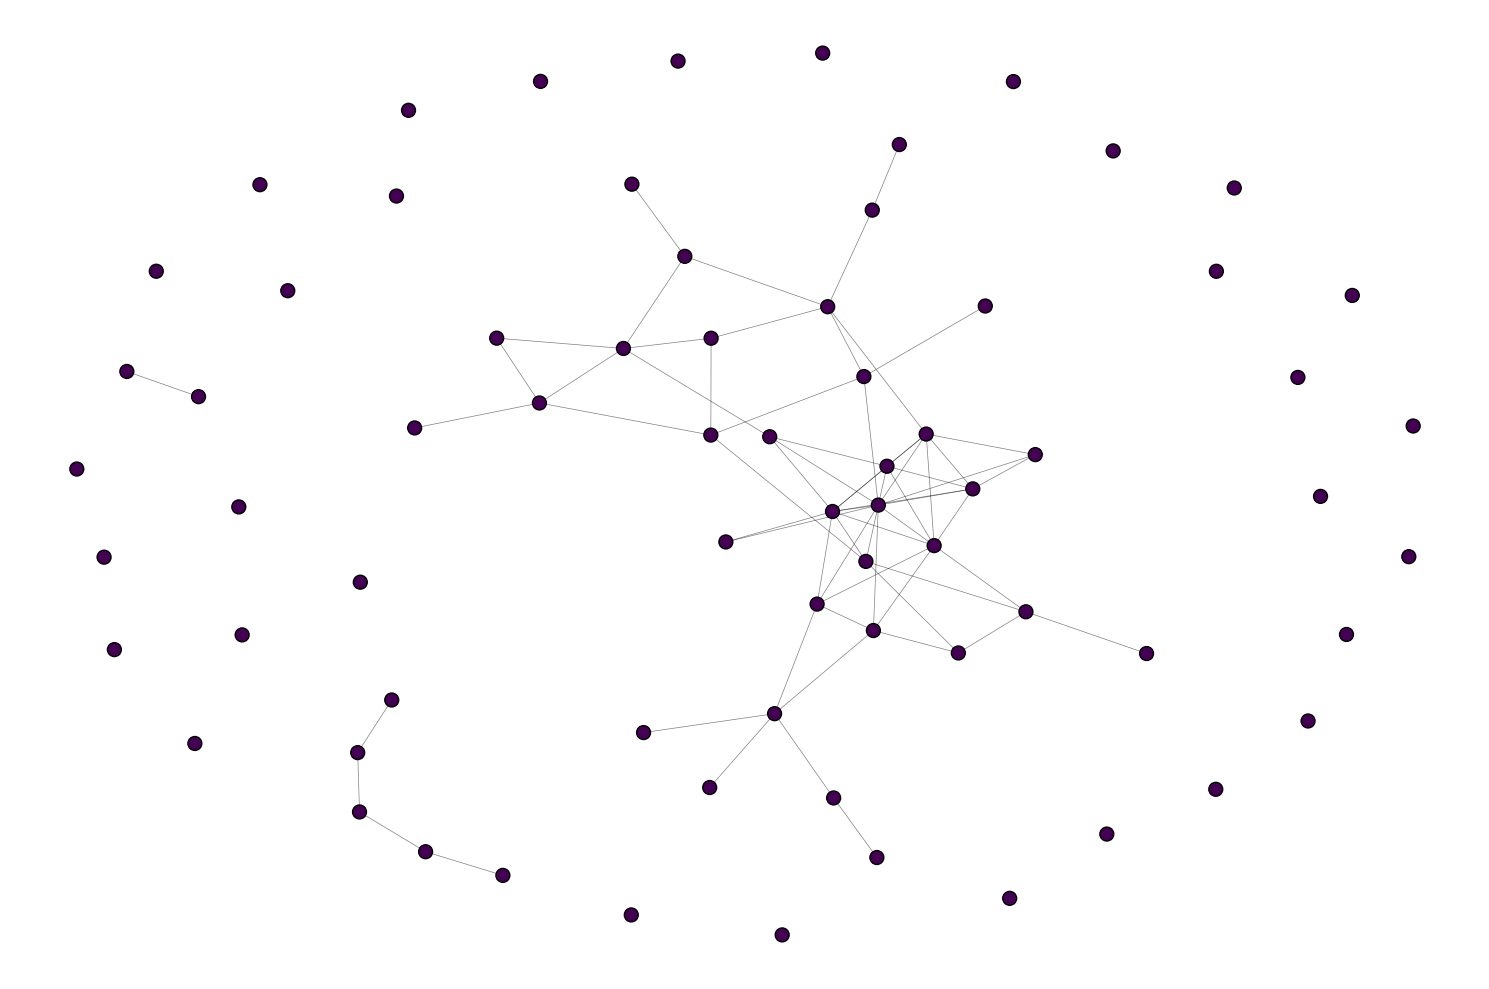

not all the nodes are connected


In [25]:
grpl.visualize_network(secretome_network)
print("not all the nodes are connected")

## in this snipped I will find the shortest paths between the seeds in order to "force" the connections 

In [26]:
shortest_paths = {}
for node1 in secretome_proteins:
    for node2 in secretome_proteins:
        if node1 != node2:
            shortest_paths[(node1, node2)] = nx.shortest_path(interactome_net, source=node1, target=node2)


In [27]:
all_nodes = set()
for path in shortest_paths.values():
    all_nodes.update(path)
all_nodes

{'A2M',
 'ABL1',
 'ACKR1',
 'ACKR2',
 'ACKR4',
 'ACP5',
 'ACTA2',
 'ACTB',
 'ACTG1',
 'ACTN4',
 'ADAM17',
 'ADAM19',
 'ADAMTS1',
 'ADAMTS2',
 'ADAMTSL4',
 'ADGRL1',
 'ADGRV1',
 'ADRB1',
 'ADRB2',
 'AGGF1',
 'AGPAT5',
 'AHNAK2',
 'AIFM1',
 'AKT1',
 'ALDH18A1',
 'AMIGO1',
 'ANKRD46',
 'ANP32A',
 'ANP32B',
 'ANXA2',
 'APC',
 'API5',
 'APOE',
 'APP',
 'AQP3',
 'AQP6',
 'AREG',
 'ARL5B',
 'ARMC8',
 'ASGR2',
 'ASPH',
 'ATP12A',
 'ATP13A1',
 'ATP1A3',
 'ATP2B4',
 'ATP5IF1',
 'ATP8B2',
 'B3GAT3',
 'B4GALT5',
 'BAG4',
 'BCAN',
 'BEX2',
 'BGN',
 'BID',
 'BIRC2',
 'BIRC3',
 'BMP4',
 'BMP5',
 'BMPR1A',
 'BMPR2',
 'BRD4',
 'BSCL2',
 'BSG',
 'C16orf92',
 'C1GALT1C1',
 'C20orf141',
 'CALM1',
 'CALR',
 'CAMK1',
 'CANX',
 'CAPN1',
 'CASK',
 'CASP1',
 'CASP3',
 'CASP8',
 'CBL',
 'CBLB',
 'CBLC',
 'CCDC33',
 'CCDC8',
 'CCL11',
 'CCL13',
 'CCL14',
 'CCL17',
 'CCL19',
 'CCL2',
 'CCL20',
 'CCL21',
 'CCL22',
 'CCL23',
 'CCL27',
 'CCL3',
 'CCL4L1',
 'CCL5',
 'CCL7',
 'CCN2',
 'CCNA2',
 'CCR1',
 'CCR10',
 'CCR

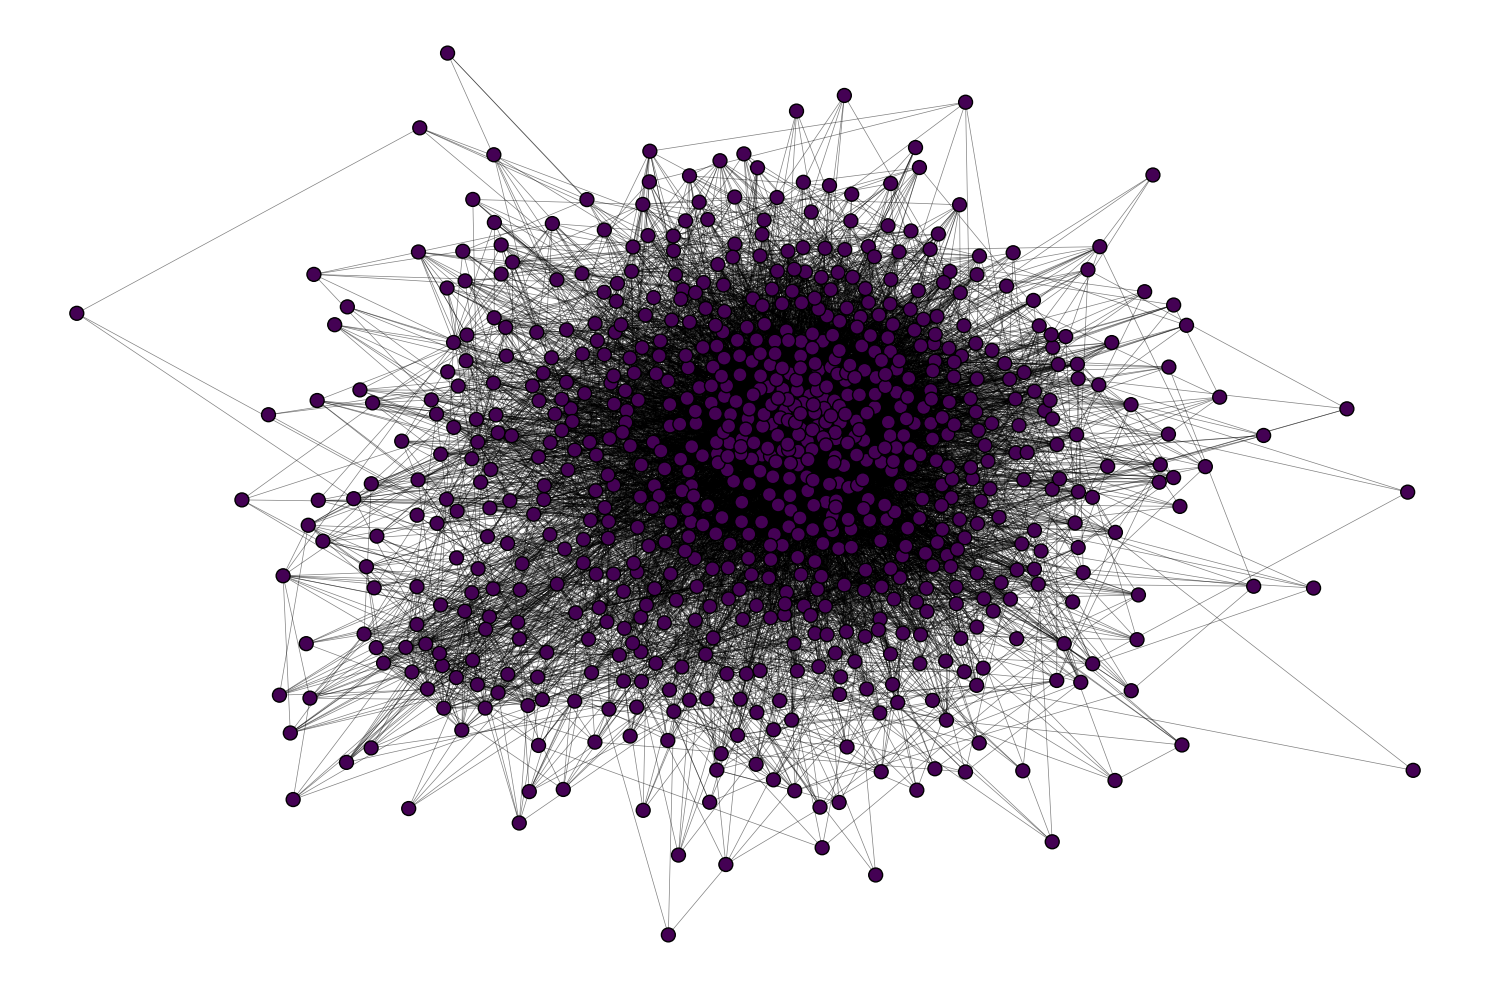

In [28]:
subnet_enriched = nx.subgraph(interactome_net,all_nodes)
grpl.visualize_network(subnet_enriched)

# create the new interactome as well as new seed files

In [29]:
subnet_enriched_sif = nx.to_pandas_edgelist(subnet_enriched)
subnet_enriched_sif.insert(1,'score',1)
subnet_enriched_sif

,source,score,target
0,CCL14,1,CCR1
1,CCL14,1,CCR3
2,CCL14,1,CCR5
3,CCL14,1,ACKR2
4,CCL14,1,PIK3R1
...,...,...,...
15777,ICAM1,1,ICAM1
15778,ICAM1,1,ILF3
15779,PTPRZ1,1,PTPRZ1
15780,SDC1,1,SDC1


In [30]:
subnet_enriched_sif.to_csv('../inputs/subnet_enriched.sif',index=None,header=None,sep = ' ')

In [31]:
experiments = ['No_Treat','-IL10','-IL1$','-IL4','IL1\+IL4','IL1\+IL10']

for i,exp in enumerate(experiments):
    print(i)
    df = secretome_deg[secretome_deg.index.str.contains(exp,regex=True)]
    secretome_proteins = df.columns.tolist()
    means = [df[col].mean() for col in df.columns.tolist()]
    scaled_means = minmax_scale_list(means)
    display(df)
    # Make a dictionary of cytokynes and values
    dictionary_of_means = dict(zip(df.columns.tolist(),scaled_means))
    
    # Force manually depending on the experiment
    if i == 1:
        dictionary_of_means['IL10'] = 1
    elif i == 2:
        dictionary_of_means['IL1'] = 1
    elif i == 3:
        dictionary_of_means['IL4'] = 1
    elif i == 4:
        dictionary_of_means['IL1'] = 1
        dictionary_of_means['IL4'] = 1
    elif i == 5:
        dictionary_of_means['IL1'] = 1
        dictionary_of_means['IL10'] = 1
    # Add the rest of the nodes
    
    for node in all_nodes:
        if node not in secretome_proteins:
            dictionary_of_means[node] = 0

    # Write the files
    with open('../inputs/secretome/degenerated_'+exp.replace('\\','').replace('$','')+'_nodes.txt','w') as f:
        for gene,score in dictionary_of_means.items():
            f.write(gene + ' ' + str(score) + ' ' + '\n')   

0


3,IL4,IL1B,IL1A,IFNG,CSF3,KITLG,IL17F,IL7,IL16,IL18,...,TGFB1,CCL11,VCAM1,TIMP1,MMP2,MMP9,CCL5,ICAM1,SERPINE1,DEFB1
Analyte:,,,,,,,,,,,,,,,,,,,,,
AL-HD615-No_Treat,16.334167,2.12132,2.12132,9.644712,22.839549,0.874481,16.263456,4.202144,13.05911,2.374642,...,48.083261,4.239571,104.474958,604.015399,16600,11.147597,2.12132,80.249143,221.041016,3.772314
AL-HD665-No_Treat,16.334167,2.12132,2.12132,10.169779,22.839549,1.163326,16.263456,4.368673,11.513186,2.028707,...,48.083261,2.12132,23.252276,1900,16600,2.12132,4.587019,142.308246,411.494811,14.339602
AL-HD675-No_Treat,16.334167,2.12132,2.12132,7.212489,22.839549,0.494975,16.263456,5.054099,2.12132,1.478775,...,48.083261,2.12132,37.613553,1900,16600,2.775807,5.391619,97.085206,2421.376833,2.12132


1


3,IL4,IL1B,IL1A,IFNG,CSF3,KITLG,IL17F,IL7,IL16,IL18,...,TGFB1,CCL11,VCAM1,TIMP1,MMP2,MMP9,CCL5,ICAM1,SERPINE1,DEFB1
Analyte:,,,,,,,,,,,,,,,,,,,,,
AL-HD615-IL10,23.51159,2.12132,2.12132,10.609799,22.839549,1.183071,16.263456,4.386326,18.56173,2.846589,...,48.083261,2.12132,108.418647,702.627301,16600,9.754657,2.12132,85.978732,233.264785,3.712083
AL-HD665-IL10,26.241594,2.12132,2.12132,11.821619,22.839549,1.098112,16.263456,5.131409,19.493449,2.516201,...,48.083261,2.12132,22.219462,1885.052654,16600,5.735679,4.607011,137.831292,397.963415,13.321862
AL-HD675-IL10,16.334167,2.12132,2.12132,11.466285,22.839549,0.494975,16.263456,5.276014,5.04451,2.239715,...,48.083261,2.47526,21.84696,1900,16484.575504,2.826139,3.361477,63.160337,1135.644702,2.12132


2


3,IL4,IL1B,IL1A,IFNG,CSF3,KITLG,IL17F,IL7,IL16,IL18,...,TGFB1,CCL11,VCAM1,TIMP1,MMP2,MMP9,CCL5,ICAM1,SERPINE1,DEFB1
Analyte:,,,,,,,,,,,,,,,,,,,,,
AL-HD615-IL1,19.295608,291.256274,2.12132,8.49103,22.839549,1.205391,16.263456,4.055407,22.376401,2.271954,...,48.083261,4.031431,140.636079,969.745844,16600,7.508059,5.95097,114.818614,157.091342,4.907788
AL-HD665-IL1,36.98887,574.901321,2.12132,22.054829,547.093886,2.376918,16.263456,7.436237,35.634385,3.376092,...,48.083261,2.12132,22.540268,1900,16600,2.12132,17.269921,383.345889,378.11869,7.179134
AL-HD675-IL1,35.013246,438.349415,2.423972,20.398953,406.265026,2.264873,16.263456,6.424684,34.933461,3.996861,...,48.083261,3.077584,364.861568,1900,16600,2.675259,163.335185,368.082444,432.487775,7.276256


3


3,IL4,IL1B,IL1A,IFNG,CSF3,KITLG,IL17F,IL7,IL16,IL18,...,TGFB1,CCL11,VCAM1,TIMP1,MMP2,MMP9,CCL5,ICAM1,SERPINE1,DEFB1
Analyte:,,,,,,,,,,,,,,,,,,,,,
AL-HD615-IL4,5500,2.12132,2.12132,26.086864,22.839549,1.342757,25.912579,8.066916,13.271306,3.678564,...,48.083261,2.12132,357.354307,795.543241,16600,8.443997,2.12132,85.23625,277.85187,3.951051
AL-HD665-IL4,5500,2.12132,2.653387,23.656137,22.839549,1.948267,25.811742,6.93873,18.177034,3.904087,...,48.083261,2.12132,66.558189,1683.318724,16600,2.12132,4.169015,122.197678,462.166909,11.877325
AL-HD675-IL4,5500,2.12132,2.12132,28.254954,22.839549,1.473322,24.054552,7.200225,5.820328,3.391803,...,48.083261,3.578541,93.802798,1900,16600,2.44965,3.389407,59.466941,650.547391,2.12132


4


3,IL4,IL1B,IL1A,IFNG,CSF3,KITLG,IL17F,IL7,IL16,IL18,...,TGFB1,CCL11,VCAM1,TIMP1,MMP2,MMP9,CCL5,ICAM1,SERPINE1,DEFB1
Analyte:,,,,,,,,,,,,,,,,,,,,,
AL-HD615-IL1+IL4,5500,307.024994,3.917148,38.476441,22.839549,2.618678,29.706778,8.663216,30.972071,5.6635,...,48.083261,2.12132,488.974642,1226.358377,16600,5.469078,4.833154,110.573735,157.399792,4.343915
AL-HD665-IL1+IL4,5500,387.883036,7.745424,48.590166,444.623289,3.625692,38.007146,11.517742,41.409328,6.007957,...,48.083261,2.12132,138.462271,1900,16600,2.12132,22.847101,369.759991,308.684077,6.888106
AL-HD675-IL1+IL4,5019.265472,321.206514,4.565344,38.264092,387.096714,2.992257,29.703529,9.124147,39.609576,5.02026,...,48.083261,2.12132,1155.67953,1900,16600,2.12132,96.263076,222.295362,424.43717,5.234827


5


3,IL4,IL1B,IL1A,IFNG,CSF3,KITLG,IL17F,IL7,IL16,IL18,...,TGFB1,CCL11,VCAM1,TIMP1,MMP2,MMP9,CCL5,ICAM1,SERPINE1,DEFB1
Analyte:,,,,,,,,,,,,,,,,,,,,,
AL-HD615-IL1+IL10,26.330058,259.01308,2.41846,12.330439,137.901803,1.315865,16.263456,4.509176,25.453421,2.442988,...,48.083261,2.12132,136.453548,821.631732,16600,10.69262,5.375977,88.389069,128.466617,4.368767
AL-HD665-IL1+IL10,43.859717,355.274096,3.072196,29.75398,438.404543,2.771022,26.000169,7.070664,37.126179,4.782072,...,48.083261,2.897013,31.156365,1900,16600,2.12132,20.462894,387.710039,408.60976,9.079884
AL-HD675-IL1+IL10,1814.452568,210.248526,2.547812,23.80388,279.828826,1.903229,21.914514,6.111637,30.500823,3.42862,...,48.083261,2.12132,323.688583,1900,16600,3.280661,134.485175,288.873905,344.488458,4.600817


# Parse healthy file

In [32]:
secretome_healthy = secretome_healthy.iloc[11:15]


In [33]:
secretome_healthy.set_index('Analyte:',inplace=True)

In [34]:
secretome_healthy

3,IL4,IL1B,IL1A,IFNG,CSF3,KITLG,IL17F,IL7,IL16,IL18,...,TGFB1,CCL11,VCAM1,TIMP1,MMP2,MMP9,CCL5,ICAM1,SERPINE1,DEFB1
Analyte:,,,,,,,,,,,,,,,,,,,,,
Analyte:,IL4,IL1b,IL1A,IFNG,G-CSF,SCF,IL17F,IL7,IL16,IL18,...,TGF-b1,Eotaxin,VCAM1,TIMP1,MMP2,MMP9,RANTES,ICAM1,PAI-1,DEFB1
Ctrl,16.334167,2.12132,2.12132,7.212489,25.998347,0.787417,16.263456,2.12132,2.12132,2.483727,...,75.964071,2.12132,183.742592,2043.327402,3172.412026,2.909747,5.783797,36.499868,3415.248219,9.410854
10ng/ml IL4,444.903566,2.12132,2.12132,14.288538,22.839549,1.32677,16.263456,2.642344,2.12132,1.450148,...,65.699719,2.12132,373.871634,2286.971441,3460.932579,3.32896,5.695639,45.048326,3446.90443,8.894347
1ng/ml IL1,37.210467,172.42016,2.12132,16.369323,152.499418,3.785343,16.263456,3.057097,32.45344,4.463582,...,55.332347,2.12132,477.833523,2215.3811,3060.108216,11.995282,22.402134,328.575589,1563.582466,9.315541


In [35]:
experiments = ['Ctrl',"IL4","IL1"]

for i,exp in enumerate(experiments):
    df = secretome_healthy[secretome_healthy.index.str.contains(exp)]
    display(df.head())
    secretome_proteins = df.columns.tolist()
    means = [df[col].mean() for col in df.columns.tolist()]
    scaled_means = minmax_scale_list(means)
    
    # Make a dictionary of cytokynes and values
    dictionary_of_means = dict(zip(df.columns.tolist(),scaled_means))
    
    # Force manually depending on the experiment
    if i == 1:
        dictionary_of_means['IL4'] = 1
    elif i == 2:
        dictionary_of_means['IL1'] = 1
    
    for node in all_nodes:
        if node not in secretome_proteins:
            dictionary_of_means[node] = 0

    # Write the files
    with open('../inputs/secretome/healthy_'+exp+'_nodes.txt','w') as f:
        for gene,score in dictionary_of_means.items():
            f.write(gene + ' ' + str(score) + ' ' + '\n') 

3,IL4,IL1B,IL1A,IFNG,CSF3,KITLG,IL17F,IL7,IL16,IL18,...,TGFB1,CCL11,VCAM1,TIMP1,MMP2,MMP9,CCL5,ICAM1,SERPINE1,DEFB1
Analyte:,,,,,,,,,,,,,,,,,,,,,
Ctrl,16.334167,2.12132,2.12132,7.212489,25.998347,0.787417,16.263456,2.12132,2.12132,2.483727,...,75.964071,2.12132,183.742592,2043.327402,3172.412026,2.909747,5.783797,36.499868,3415.248219,9.410854


3,IL4,IL1B,IL1A,IFNG,CSF3,KITLG,IL17F,IL7,IL16,IL18,...,TGFB1,CCL11,VCAM1,TIMP1,MMP2,MMP9,CCL5,ICAM1,SERPINE1,DEFB1
Analyte:,,,,,,,,,,,,,,,,,,,,,
10ng/ml IL4,444.903566,2.12132,2.12132,14.288538,22.839549,1.32677,16.263456,2.642344,2.12132,1.450148,...,65.699719,2.12132,373.871634,2286.971441,3460.932579,3.32896,5.695639,45.048326,3446.90443,8.894347


3,IL4,IL1B,IL1A,IFNG,CSF3,KITLG,IL17F,IL7,IL16,IL18,...,TGFB1,CCL11,VCAM1,TIMP1,MMP2,MMP9,CCL5,ICAM1,SERPINE1,DEFB1
Analyte:,,,,,,,,,,,,,,,,,,,,,
1ng/ml IL1,37.210467,172.42016,2.12132,16.369323,152.499418,3.785343,16.263456,3.057097,32.45344,4.463582,...,55.332347,2.12132,477.833523,2215.3811,3060.108216,11.995282,22.402134,328.575589,1563.582466,9.315541


# Run Guild

In [36]:
ls ../guild/

README.md*  boost_1_85_0.tar*  data/  doc/  guild_mac*  guild_x64*  src/


In [38]:
import subprocess
import os
interactome_path = '../inputs/'
nodes_path = '../inputs/secretome/'
output_path = '../outputs/secretome/'


for file in os.listdir('../inputs/secretome/'):
    exp_name = file.replace('_nodes.txt','')
    # subprocess.run(['bash','../guild/guild_x64','-s','s','-n',nodes_path+file,'-e',interactome_path+'interactome.sif','-o',output_path+exp_name+'_out.txt'],cwd='../guild/',env={'PATH': '/usr/local/bin:/usr/bin:/bin'})
    os.system('chmod 777 ../inputs/secretome/')
    os.system(f'../guild/guild_x64 -s s -n {nodes_path+file} -e {interactome_path}subnet_enriched.sif -o {output_path+exp_name}_output.txt -i 3 -r 2')

Arguments: scoring type s, nRepetition 2, nIteration 3, nodeFile ../inputs/secretome/degenerated_-IL10_nodes.txt, edgeFile ../inputs/subnet_enriched.sif, outputFile ../outputs/secretome/degenerated_-IL10_output.txt
Time: 5483393 (5.48339s)
Arguments: scoring type s, nRepetition 2, nIteration 3, nodeFile ../inputs/secretome/degenerated_-IL1_nodes.txt, edgeFile ../inputs/subnet_enriched.sif, outputFile ../outputs/secretome/degenerated_-IL1_output.txt
Time: 7000667 (7.00067s)
Arguments: scoring type s, nRepetition 2, nIteration 3, nodeFile ../inputs/secretome/degenerated_-IL4_nodes.txt, edgeFile ../inputs/subnet_enriched.sif, outputFile ../outputs/secretome/degenerated_-IL4_output.txt
Time: 6636475 (6.63647s)
Arguments: scoring type s, nRepetition 2, nIteration 3, nodeFile ../inputs/secretome/degenerated_IL1+IL10_nodes.txt, edgeFile ../inputs/subnet_enriched.sif, outputFile ../outputs/secretome/degenerated_IL1+IL10_output.txt
Time: 6474826 (6.47483s)
Arguments: scoring type s, nRepetition

# RUN DIPPER YOUNG AND OLD

In [2]:
# Load the data and parse the interactome
interactome = pd.read_csv('../data/HIPPIE-current.mitab.txt',sep='\t',low_memory=False)
interactome = interactome[interactome.columns[:2]]
interactome[interactome.columns[0]] = interactome[interactome.columns[0]].apply(lambda x: x.replace('entrez gene:',''))
interactome[interactome.columns[1]] = interactome[interactome.columns[1]].apply(lambda x: x.replace('entrez gene:',''))
interactome = interactome[~interactome['ID Interactor A'].str.contains('-')]
interactome = interactome[~interactome['ID Interactor B'].str.contains('-')]
interactome = interactome.astype(int)
interactome['ID_A_symbol'] = gp.geneId_mapping(interactome['ID Interactor A'].tolist(),'entrez','symbol')
interactome['ID_B_symbol'] = gp.geneId_mapping(interactome['ID Interactor B'].tolist(),'entrez','symbol')
interactome.dropna(inplace=True)
interactome_net = nx.from_pandas_edgelist(interactome[['ID_A_symbol','ID_B_symbol']],source='ID_A_symbol',target='ID_B_symbol')
largest_cc = max(nx.connected_components(interactome_net), key=len)
interactome_cc = nx.subgraph(interactome_net,largest_cc)
interactome_pandas = nx.to_pandas_edgelist(interactome_cc)
interactome_pandas.insert(1,'score',1)
il4_edges = interactome[(interactome.ID_A_symbol == 'IL4') | (interactome.ID_B_symbol == 'IL4')].iloc[:,2:].values
il10_edges = interactome[(interactome.ID_A_symbol == 'IL10') | (interactome.ID_B_symbol == 'IL10')].iloc[:,2:].values
il10_genes= set([item for sublist in il10_edges for item in sublist if item != 'IL10'])
il4_genes= set([item for sublist in il4_edges for item in sublist if item != 'IL4'])
genes_interactome = set(interactome_pandas['source'].tolist() + interactome_pandas['target'].tolist())



In [14]:
Dipper = pd.read_csv('../data/dipper_protein_expression.csv')
Dipper=Dipper.iloc[:,2:]
Dipper.columns=[x.replace(".", "_") for x in Dipper.columns]
columnyoungfilter=[column for column in Dipper.columns.tolist() if ('young_NP' in column) ]
columnoldfilter=[column for column in Dipper.columns.tolist() if ('old_NP' in column) ]

columnyoungfilter=columnyoungfilter+list(Dipper.columns[:3])
columnoldfilter = columnoldfilter+list(Dipper.columns[:3])

dipper_young = Dipper[columnyoungfilter]
dipper_old = Dipper[columnoldfilter]
dipper_young = dipper_young.dropna(subset=['L3_4_young_NP','L4_5_young_NP','L5_S1_young_NP'],how='all')
dipper_old = dipper_old.dropna(subset=['L3_4_old_NP','L4_5_old_NP','L5_S1_old_NP'],how='all')



# Here we will filter the interactome:

We need to obtain 4 interactomes with All the genes that interact with il4 and il10 and that are expressed in the disc, if there is no expression of these we will force the genes to be there

In [6]:
gene_symbol_list_seeds=['IL6', 'IL6ST','IL16', 'IL1B', 'IL17D', 'IL18', 'IL20', 'TNF', 'LIF', 'OSM', 'CCL2', 'CCL3', 'CCL5', 'CCL7', 'CXCL1', 'CXCL2', 'CXCL3', 'CXCL8', 'CX3CL1', 'IGF1', 'GDF5', 'TGFB1', 'GDF6', 'PMP2', 'VEGFA']


In [96]:
# get the genes of dipper young and old
genes_dipper_young = dipper_young['Gene_names'].tolist()
genes_dipper_old = dipper_old['Gene_names'].tolist()

# The seeds have been found in the lab to be expressed in the disc so we will force their presence in the final interactomes
missing_seeds_young = [gene for gene in gene_symbol_list_seeds if gene not in genes_dipper_young]
missing_seeds_old = [gene for gene in gene_symbol_list_seeds if gene not in genes_dipper_old]
genes_interactome_expressed_young = dipper_young.Gene_names.tolist() + missing_seeds_young
genes_interactome_expressed_old = dipper_old.Gene_names.tolist() + missing_seeds_old

# We will force also in the interactome to be present the genes that interact with Il4 and IL10 that are expressed 
filtered_connections_il10 = [edge for edge in il10_edges if ('IGHG1' in edge) or ('A2M' in edge)]
filtered_connections_il4 = [edge for edge in il4_edges if 'A2M' in edge]
filtered_connections_il10_df = pd.DataFrame([[a,1,b] for [a,b] in filtered_connections_il10],columns=['source','sore','target'])
filtered_connections_il4_df = pd.DataFrame([[a,1,b] for [a,b] in filtered_connections_il4],columns=['source','sore','target'])


# Create the 2 filtered interactomes
interactome_young = interactome_pandas[(interactome_pandas.source.isin(genes_interactome_expressed_young)) | (interactome_pandas.target.isin(genes_interactome_expressed_young))]
interactome_old = interactome_pandas[(interactome_pandas.source.isin(genes_interactome_expressed_old)) | (interactome_pandas.target.isin(genes_interactome_expressed_old))]
interactome_young_IL4 = pd.concat([interactome_young,filtered_connections_il4_df],ignore_index=True)
interactome_old_IL4 = pd.concat([interactome_old,filtered_connections_il4_df],ignore_index=True)
interactome_young_IL10 = pd.concat([interactome_young,filtered_connections_il10_df],ignore_index=True)
interactome_old_IL10 = pd.concat([interactome_young,filtered_connections_il10_df],ignore_index=True)

# Make sure the filtered young and old interactomes are connected
interactome_young_net = nx.from_pandas_edgelist(interactome_young)
interactome_old_net = nx.from_pandas_edgelist(interactome_old)
interactome_young_net_IL4 = nx.from_pandas_edgelist(interactome_young_IL4)
interactome_old_net_IL4 = nx.from_pandas_edgelist(interactome_old_IL4)
interactome_young_net_IL10 = nx.from_pandas_edgelist(interactome_young_IL10)
interactome_old_net_IL10 = nx.from_pandas_edgelist(interactome_old_IL10)

# Create seeds files
seeds_young = list(zip(genes_interactome_expressed_young, [1 if gene in gene_symbol_list_seeds else 0 for gene in genes_interactome_expressed_young]))
# write the inputs
with open(f'../inputs/Dipper/seeds_young.txt','w') as f:
    for s in seeds_young:
        f.write(str(s[0]) + '\t' + str(s[1]) + '\n')

seeds_young_IL4 = list(zip(genes_interactome_expressed_young + ['IL4'], [1 if gene in gene_symbol_list_seeds +['IL4'] else 0 for gene in genes_interactome_expressed_young + ['IL4']]))
# write the inputs
with open(f'../inputs/Dipper/seeds_young_IL4.txt','w') as f:
    for s in seeds_young_IL4:
        f.write(str(s[0]) + '\t' + str(s[1]) + '\n')
        
seeds_young_IL10 = list(zip(genes_interactome_expressed_young + ['IL10'], [1 if gene in gene_symbol_list_seeds +['IL10'] else 0 for gene in genes_interactome_expressed_young + ['IL10']]))
# write the inputs
with open(f'../inputs/Dipper/seeds_young_IL10.txt','w') as f:
    for s in seeds_young_IL10:
        f.write(str(s[0]) + '\t' + str(s[1]) + '\n')

seeds_old= list(zip(genes_interactome_expressed_old, [1 if gene in gene_symbol_list_seeds else 0 for gene in genes_interactome_expressed_old]))
# write the inputs
with open(f'../inputs/Dipper/seeds_old.txt','w') as f:
    for s in seeds_old:
        f.write(str(s[0]) + '\t' + str(s[1]) + '\n')

seeds_old_IL4 = list(zip(genes_interactome_expressed_old + ['IL4'], [1 if gene in gene_symbol_list_seeds +['IL4'] else 0 for gene in genes_interactome_expressed_old + ['IL4']]))
# write the inputs
with open(f'../inputs/Dipper/seeds_old_IL4.txt','w') as f:
    for s in seeds_old_IL4:
        f.write(str(s[0]) + '\t' + str(s[1]) + '\n')
        
seeds_old_IL10 = list(zip(genes_interactome_expressed_old + ['IL10'], [1 if gene in gene_symbol_list_seeds +['IL10'] else 0 for gene in genes_interactome_expressed_old + ['IL10']]))
# write the inputs
with open(f'../inputs/Dipper/seeds_old_IL10.txt','w') as f:
    for s in seeds_old_IL10:
        f.write(str(s[0]) + '\t' + str(s[1]) + '\n')





# RUN THE EXPERIMENTS IT WILL BE 6 EXPERIMENTS AS FOLLOWS:
 - YOUNG ALLSEEDS
 - YOUNG ALLSEEDS + IL4
 - YOUNG ALLSEEDS + IL10
 - OLD ALLSEEDS
 - OLD ASLLSEEDS + IL4
 - OLD ALLSEEDS + IL10

In [26]:


for i,exp in enumerate(experiments):
    # The interactome have to be composed from only the genes experessed either in old and young dipper
    if i == 0:
        print(f"Performing experiment {exp}")

        # running guild
        os.system(f'../guild/guild_x64 -s s -n {f'../inputs/{exp}_seeds.txt'} -e ../inputs/interactome_young.txt -o ../outputs/{exp}_Dipper_out.txt')
        
        
        
    elif i == 1:
        print(f"Performing experiment {exp}")
        # make the seeds file
        seeds = list(zip(genes_interactome_expressed_old, [1 if gene in gene_symbol_list_seeds else 0 for gene in genes_interactome_expressed_old]))
        # write the inputs
        with open(f'../inputs/{exp}_seeds.txt','w') as f:
            for s in seeds:
                f.write(str(s[0]) + '\t' + s[1] + '\n')
        # run guild
        os.system(f'../guild/guild_x64 -s s -n {f'../inputs/{exp}_seeds.txt'} -e ../inputs/interactome_old.txt -o ../outputs/{exp}_Dipper_out.txt')
        
    elif i == 2:
        print(f"Performing experiment {exp}")
        # Append the connection of IL4 
        
        
        seeds = list(zip(genes_interactome_expressed_young_IL4, [1 if gene in gene_symbol_list_seeds_IL4 else 0 for gene in genes_interactome_expressed_young_IL4]))

        # make the seeds file
        seeds = list(zip(genes_interactome_expressed_old, [1 if gene in gene_symbol_list_seeds else 0 for gene in genes_interactome_expressed_old]))
        # write the inputs
        with open(f'../inputs/{exp}_seeds.txt','w') as f:
            for s in seeds:
                f.write(str(s[0]) + '\t' + s[1] + '\n')
        # run guild
        os.system(f'../guild/guild_x64 -s s -n {f'../inputs/{exp}_seeds.txt'} -e ../inputs/interactome_old.sif -o ../outputs/{exp}_Dipper_out.txt')
        
                

(129094, 3)
(111285, 3)


In [42]:
il10_edges

array([['IL10', 'IL10'],
       ['IL10', 'IL10RB'],
       ['IL10RA', 'IL10'],
       ['IL10', 'A2M'],
       ['IGHG1', 'IL10'],
       ['KRTAP10-8', 'IL10'],
       ['GLRX3', 'IL10'],
       ['KRTAP1-3', 'IL10'],
       ['YY1', 'IL10'],
       ['IL10', 'CCNA2'],
       ['IL10', 'KRTAP4-1'],
       ['IL10', 'CRYGD'],
       ['IL10', 'LRP2'],
       ['IL10', 'MTMR3'],
       ['IL10', 'VGF'],
       ['IL10', 'MTMR4'],
       ['IL10', 'NOTCH2NLA']], dtype=object)

In [7]:
interactome_old_IL10.tail()

,source,score,target,sore
139829,KRTAP6-1,1.0,ITIH6,NaN
139830,ITIH6,1.0,SMIM29,NaN
139831,OR2A4,1.0,IGLC6,NaN
139832,IL10,NaN,A2M,1.0
139833,IGHG1,NaN,IL10,1.0


In [5]:
[gene for gene in gene_symbol_list_seeds if gene not in nodes_young]

['CCL4']

In [110]:
'CCL4' in genes_interactome_expressed_young

True

In [109]:
[gene for gene in gene_symbol_list_seeds if gene not in nodes_old]

['CCL4']

In [32]:
# Load the data and parse the interactome
interactome = pd.read_csv('../data/HIPPIE-current.mitab.txt',sep='\t',low_memory=False)
interactome = interactome[interactome.columns[:2]]
interactome[interactome.columns[0]] = interactome[interactome.columns[0]].apply(lambda x: x.replace('entrez gene:',''))
interactome[interactome.columns[1]] = interactome[interactome.columns[1]].apply(lambda x: x.replace('entrez gene:',''))
interactome = interactome[~interactome['ID Interactor A'].str.contains('-')]
interactome = interactome[~interactome['ID Interactor B'].str.contains('-')]
interactome = interactome.astype(int)
interactome['ID_A_symbol'] = gp.geneId_mapping(interactome['ID Interactor A'].tolist(),'entrez','symbol')
interactome['ID_B_symbol'] = gp.geneId_mapping(interactome['ID Interactor B'].tolist(),'entrez','symbol')
interactome.dropna(inplace=True)
interactome_net = nx.from_pandas_edgelist(interactome[['ID_A_symbol','ID_B_symbol']],source='ID_A_symbol',target='ID_B_symbol')
largest_cc = max(nx.connected_components(interactome_net), key=len)
interactome_cc = nx.subgraph(interactome_net,largest_cc)
interactome_pandas = nx.to_pandas_edgelist(interactome_cc)
interactome_pandas.insert(1,'score',1)
il4_edges = interactome[(interactome.ID_A_symbol == 'IL4') | (interactome.ID_B_symbol == 'IL4')].iloc[:,2:].values
il10_edges = interactome[(interactome.ID_A_symbol == 'IL10') | (interactome.ID_B_symbol == 'IL10')].iloc[:,2:].values


Dipper = pd.read_csv('../data/dipper_protein_expression.csv')
Dipper=Dipper.iloc[:,2:]
Dipper.columns=[x.replace(".", "_") for x in Dipper.columns]
columnyoungfilter=[column for column in Dipper.columns.tolist() if ('young_NP' in column) ]
columnoldfilter=[column for column in Dipper.columns.tolist() if ('old_NP' in column) ]

columnyoungfilter=columnyoungfilter+list(Dipper.columns[:3])
columnoldfilter = columnoldfilter+list(Dipper.columns[:3])

dipper_young = Dipper[columnyoungfilter]
dipper_old = Dipper[columnoldfilter]
dipper_young = dipper_young.dropna(subset=['L3_4_young_NP','L4_5_young_NP','L5_S1_young_NP'],how='all')
dipper_old = dipper_old.dropna(subset=['L3_4_old_NP','L4_5_old_NP','L5_S1_old_NP'],how='all')

gene_symbol_list_seeds=['IL6', 'IL6ST','IL16', 'IL1B', 'IL17D', 'IL18', 'IL20', 'TNF', 'LIF', 'OSM', 'CCL2', 'CCL3', 'CCL5', 'CCL7', 'CXCL1', 'CXCL2', 'CXCL3', 'CXCL8', 'CX3CL1', 'IGF1', 'GDF5', 'TGFB1', 'GDF6', 'PMP2', 'VEGFA']
#CCL4 was removed due to the absence of data in the interactome

# get the genes of dipper young and old
genes_dipper_young = dipper_young['Gene_names'].tolist()
genes_dipper_old = dipper_old['Gene_names'].tolist()

# The seeds have been found in the lab to be expressed in the disc so we will force their presence in the final interactomes
missing_seeds_young = [gene for gene in gene_symbol_list_seeds if gene not in genes_dipper_young]
missing_seeds_old = [gene for gene in gene_symbol_list_seeds if gene not in genes_dipper_old]
genes_interactome_expressed_young = dipper_young.Gene_names.tolist() + missing_seeds_young
genes_interactome_expressed_old = dipper_old.Gene_names.tolist() + missing_seeds_old
genes_interactome_expressed_young = sum([a.split(';') for a in genes_interactome_expressed_young],[])
genes_interactome_expressed_old = sum([a.split(';') for a in genes_interactome_expressed_old],[])

# We will force also in the interactome to be present the genes that interact with Il4 and IL10 that are expressed 
filtered_connections_il10 = [edge for edge in il10_edges if ('IGHG1' in edge) or ('A2M' in edge)]
filtered_connections_il4 = [edge for edge in il4_edges if 'A2M' in edge]
filtered_connections_il10_df = pd.DataFrame([[a,1,b] for [a,b] in filtered_connections_il10],columns=['source','score','target'])
filtered_connections_il4_df = pd.DataFrame([[a,1,b] for [a,b] in filtered_connections_il4],columns=['source','score','target'])

# Create the filtered interactomes
interactome_young = interactome_pandas[(interactome_pandas.source.isin(genes_interactome_expressed_young)) | (interactome_pandas.target.isin(genes_interactome_expressed_young))]
interactome_old = interactome_pandas[(interactome_pandas.source.isin(genes_interactome_expressed_old)) | (interactome_pandas.target.isin(genes_interactome_expressed_old))]
interactome_young_IL4 = pd.concat([interactome_young,filtered_connections_il4_df])
interactome_old_IL4 = pd.concat([interactome_old,filtered_connections_il4_df])
interactome_young_IL10 = pd.concat([interactome_young,filtered_connections_il10_df])
interactome_old_IL10 = pd.concat([interactome_old,filtered_connections_il10_df])


# Make sure the filtered young and old interactomes are connected
interactome_young_net = nx.from_pandas_edgelist(interactome_young)
interactome_old_net = nx.from_pandas_edgelist(interactome_old)
interactome_young_net_IL4 = nx.from_pandas_edgelist(interactome_young_IL4)
interactome_old_net_IL4 = nx.from_pandas_edgelist(interactome_old_IL4)
interactome_young_net_IL10 = nx.from_pandas_edgelist(interactome_young_IL10)
interactome_old_net_IL10 = nx.from_pandas_edgelist(interactome_old_IL10)

# Create node file
nodes_young = list(set(interactome_young.source.tolist() + interactome_young.target.tolist()))
nodes_old = list(set(interactome_old.source.tolist() + interactome_old.target.tolist()))
nodes_old_IL4 = list(set(interactome_old_IL4.source.tolist() + interactome_old_IL4.target.tolist()))
nodes_old_IL10 = list(set(interactome_old_IL10.source.tolist() + interactome_old_IL10.target.tolist()))
nodes_young_IL4 = list(set(interactome_young_IL4.source.tolist() + interactome_young_IL4.target.tolist()))
nodes_young_IL10 = list(set(interactome_young_IL10.source.tolist() + interactome_young_IL10.target.tolist()))

# Save the interactomes
def get_var_name(variable):
    for name, value in globals().items():
        if value is variable:
            return name

#check if the interactomes are all connected
interactomes = [interactome_old_net_IL10 ,interactome_young_net_IL10,interactome_old_net_IL4,interactome_young_net_IL4,interactome_old_net,interactome_young_net]

for inte in interactomes:
    int_name = get_var_name(inte)
    largest_cc = max(nx.connected_components(inte), key=len)
    if len(largest_cc)==len(inte.nodes()):
        pass
    else:
        print(f"The there is discrepancies between lcc and interactome for interactome {int_name}")


# Save the interactomes
interactomes = [interactome_old_IL10 ,interactome_young_IL10, interactome_old_IL4,interactome_young_IL4,interactome_old,interactome_young]
for inte in interactomes:
    inte_name =  get_var_name(inte)
    inte.to_csv(f'../inputs/Dipper/{inte_name}.txt',index=False,header=False,sep = '\t')

In [15]:
# Create seeds files
seeds_young = list(zip(nodes_young, [1 if gene in gene_symbol_list_seeds else 0 for gene in nodes_young]))
# write the inputs
with open(f'../inputs/Dipper/seeds_young.txt','w') as f:
    for s in seeds_young:
        f.write(str(s[0]) + '\t' + str(s[1]) + '\n')

seeds_young_IL4 = list(zip(nodes_young_IL4, [1 if gene in gene_symbol_list_seeds + ['IL4'] else 0 for gene in nodes_young_IL4]))
# write the inputs
with open(f'../inputs/Dipper/seeds_young_IL4.txt','w') as f:
    for s in seeds_young_IL4:
        f.write(str(s[0]) + '\t' + str(s[1]) + '\n')
        
seeds_young_IL10 = list(zip(nodes_young_IL10, [1 if gene in gene_symbol_list_seeds +['IL10'] else 0 for gene in nodes_young10]))
# write the inputs
with open(f'../inputs/Dipper/seeds_young_IL10.txt','w') as f:
    for s in seeds_young_IL10:
        f.write(str(s[0]) + '\t' + str(s[1]) + '\n')

seeds_old= list(zip(nodes_old, [1 if gene in gene_symbol_list_seeds else 0 for gene in nodes_old]))
# write the inputs
with open(f'../inputs/Dipper/seeds_old.txt','w') as f:
    for s in seeds_old:
        f.write(str(s[0]) + '\t' + str(s[1]) + '\n')

seeds_old_IL4 = list(zip(nodes_old + ['IL4'], [1 if gene in gene_symbol_list_seeds +['IL4'] else 0 for gene in nodes_old + ['IL4']]))
# write the inputs
with open(f'../inputs/Dipper/seeds_old_IL4.txt','w') as f:
    for s in seeds_old_IL4:
        f.write(str(s[0]) + '\t' + str(s[1]) + '\n')
        
seeds_old_IL10 = list(zip(nodes_old + ['IL10'], [1 if gene in gene_symbol_list_seeds +['IL10'] else 0 for gene in nodes_old + ['IL10']]))
# write the inputs
with open(f'../inputs/Dipper/seeds_old_IL10.txt','w') as f:
    for s in seeds_old_IL10:
        f.write(str(s[0]) + '\t' + str(s[1]) + '\n')
        

The there is discrepancies between lcc and interactome for interactome variable
The there is discrepancies between lcc and interactome for interactome variable
The there is discrepancies between lcc and interactome for interactome variable
The there is discrepancies between lcc and interactome for interactome variable
The there is discrepancies between lcc and interactome for interactome variable
The there is discrepancies between lcc and interactome for interactome variable


In [22]:
interactome_young_genes = list(set(interactome_young.source.tolist() + interactome_young.target.tolist()))
interactome_old_IL10_genes = set(interactome_old_IL10.source.tolist() + interactome_old_IL10.target.tolist())


In [33]:
all([gene in nodes_young for gene in interactome_young_genes])
all([gene in nodes_old_IL10 for gene in interactome_old_IL10_genes ])

True

In [17]:
all([gene in interactome_old_IL10_genes for gene in nodes_old + ['IL10'] ])

False

In [19]:
all([gene in nodes_old + ['IL10'] for gene in interactome_old_IL10_genes])

False

In [30]:
interactome_young_IL4

,source,score,target
5,ALDH1A1,1,NEDD8
44,ITGA7,1,ITGB1
45,ITGA7,1,COL6A1
46,ITGA7,1,LAMC1
49,ITGA7,1,COL1A2
...,...,...,...
775604,EVX2,1,ITIH6
775694,KRTAP6-1,1,ITIH6
775791,ITIH6,1,SMIM29
775810,OR2A4,1,IGLC6


In [31]:
interactome_young

,source,score,target
5,ALDH1A1,1,NEDD8
44,ITGA7,1,ITGB1
45,ITGA7,1,COL6A1
46,ITGA7,1,LAMC1
49,ITGA7,1,COL1A2
...,...,...,...
775580,AQP6,1,CGREF1
775604,EVX2,1,ITIH6
775694,KRTAP6-1,1,ITIH6
775791,ITIH6,1,SMIM29


In [4]:
with open('../outputs/Dipper/All_old_Dipper_out.txt','r') as f:
    res = f.readlines()
    
res 

['LHX1\t0\n',
 'ATG4B\t0\n',
 'UGT1A10\t0\n',
 'CELA3A\t0\n',
 'OXA1L\t0\n',
 'PTMA\t0\n',
 'FAM222B\t0\n',
 'GUCY1A1\t0\n',
 'VAMP7\t0\n',
 'DHX37\t0\n',
 'CDH9\t0\n',
 'SLC20A2\t0\n',
 'IGLL5\t0\n',
 'SATB2\t0\n',
 'GJB2\t0\n',
 'GAGE4\t0\n',
 'FGD4\t0\n',
 'AKIRIN1\t0\n',
 'RBBP6\t0\n',
 'PPP2R3A\t0\n',
 'LPIN1\t0\n',
 'KRTAP13-3\t0\n',
 'NDUFB8\t0\n',
 'DUSP1\t0\n',
 'OGDH\t0\n',
 'RECQL\t0\n',
 'CDH17\t0\n',
 'NSUN5P1\t0\n',
 'ASB14\t0\n',
 'DSE\t0\n',
 'MITF\t0\n',
 'SPG11\t0\n',
 'AKR7A3\t0\n',
 'NGRN\t0\n',
 'ZCRB1\t0\n',
 'TRIP12\t0\n',
 'FZD4\t0\n',
 'ANG\t0\n',
 'AGER\t0\n',
 'TGOLN2\t0\n',
 'ST3GAL4\t0\n',
 'IL36RN\t0\n',
 'HPS3\t0\n',
 'POLR2J\t0\n',
 'RAB19\t0\n',
 'IRAG2\t0\n',
 'USP19\t0\n',
 'ZCCHC3\t0\n',
 'PTPN3\t0\n',
 'HIVEP3\t0\n',
 'PTH\t0\n',
 'ZNF584\t0\n',
 'CDKL3\t0\n',
 'GLB1L\t0\n',
 'IQCF2\t0\n',
 'UBR3\t0\n',
 'CSF1R\t0\n',
 'TRIM35\t0\n',
 'HPSE2\t0\n',
 'S1PR5\t0\n',
 'PSMC6\t0\n',
 'CLDN1\t0\n',
 'AJUBA\t0\n',
 'AGBL5\t0\n',
 'ACSL1\t0\n',
 'DZIP3\t0\n

In [8]:
len(res) - 144

14263

In [9]:
topscoring = res[14263:]

In [27]:
genes_to_plot = [g.split('\t')[0] for g in topscoring]
scores = [g.split('\t')[1].rstrip('\n') for g in topscoring]

In [21]:
interactome_res_subnet = nx.subgraph(interactome_net,genes_to_plot)

In [29]:
seeds=['IL6', 'IL6ST','IL16', 'IL1B', 'IL17D', 'IL18', 'IL20', 'TNF', 'LIF', 'OSM', 'CCL2', 'CCL3', 'CCL5', 'CCL7', 'CXCL1', 'CXCL2', 'CXCL3', 'CXCL8', 'CX3CL1', 'IGF1', 'GDF5', 'TGFB1', 'GDF6', 'PMP2', 'VEGFA']


attributes_seed = dict(zip(genes_to_plot, [1 if gene in seeds else 0 for gene in genes_to_plot]))
attributes_score = dict(zip(genes_to_plot, scores))


In [31]:
nx.set_node_attributes(interactome_res_subnet, attributes_seed, "seed")
nx.set_node_attributes(interactome_res_subnet, attributes_score, "score")


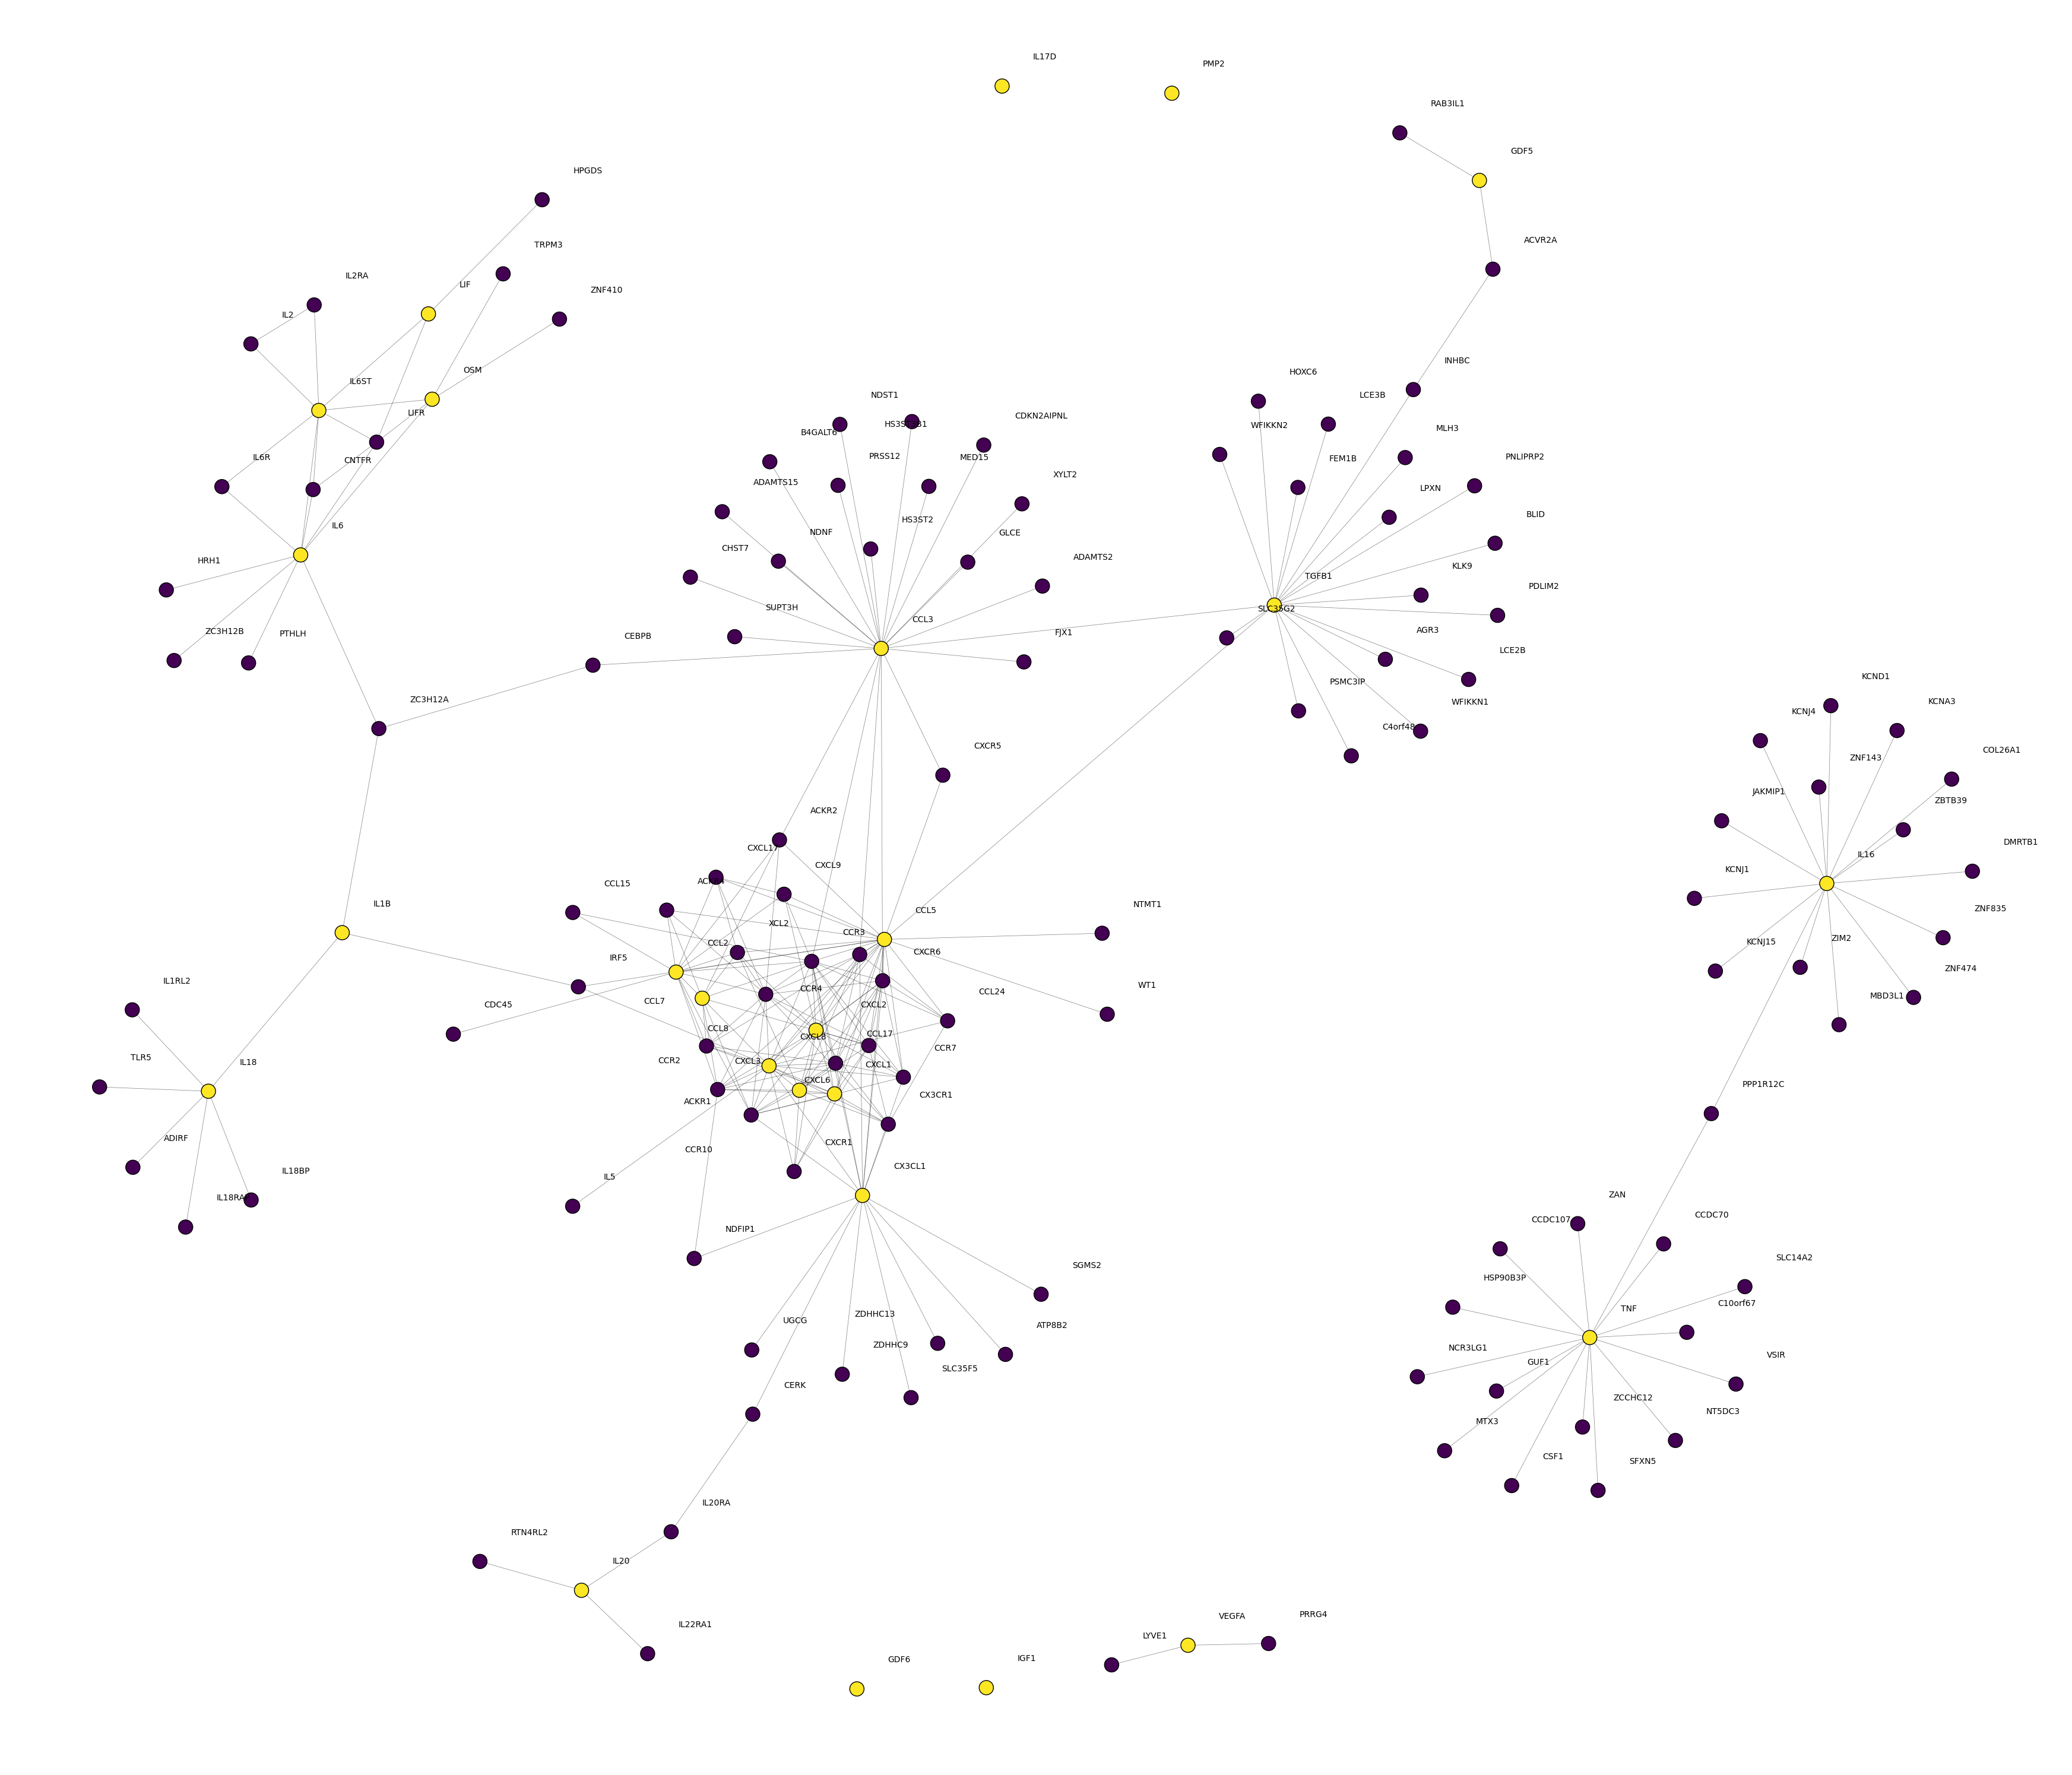

In [50]:
grpl.visualize_network(interactome_res_subnet,node_color_attribute='seed',
                       layout='auto',node_size=300,
                       figure_size=(35,30),
                       node_annotation=True)

In [4]:
import pandas as pd

sec = pd.read_csv('../inputs/subnet_enriched.sif',sep = ' ')

In [5]:
sec.to_excel('./subnet_enriched.xlsx')